In [1]:
from sector_3 import I0
from PNNI import*
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('sec2.txt') # get the data from text
values = data[:,4] # integrated value with Monte Carlo method
arguments = data[:,:3] # fixed variables values


#call PNNI class with parameter number of nodes, activation function(1=Sigmoid,0=Relu), number of networks 
#, Total number of dimensions, number of fixed dimensions, Integrand, fixed parameters
pn=PNNI(500,0,2,6,3,I0,arguments,50000)
#call PNNI function with parameter method (1=Tensorflow,0=Sklearn), normalised integrand (1=yes,0=no) , number of epoch
a1=pn.get_result(1,1,100)

2022-08-23 18:32:44.774797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-23 18:32:45.513088: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11063 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:3e:00.0, compute capability: 6.1


Finish fitting
Finish fitting


In [2]:
def digit(analy,numeric): # get the correct digits
    return -np.log10(abs((analy-numeric)/analy))

norm_val=[]
for i in range(len(values)):
    norm_val.append(values[i]/(I0(np.array([1/2]*(3)),arguments[i,],[])))

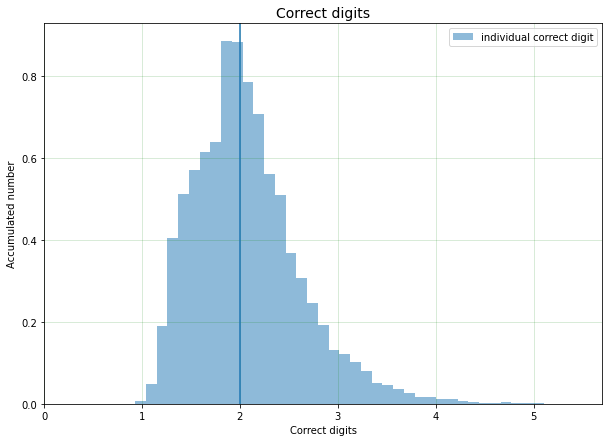

In [7]:
import matplotlib.pyplot as plt
digits=digit(np.array(norm_val),a1)
plt.figure(figsize=(10,7))
plt.hist(digits,bins=50, density=True, alpha=0.5, label= 'individual correct digit')
plt.axvline(x=np.median(digits))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green',alpha=0.3)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Correct digits", fontsize=14)
plt.xlabel('Correct digits')
plt.ylabel('Accumulated number')
plt.legend(loc='upper right')
plt.xlim(0,5.7)
plt.show()